# Projeto 1 - Influência dos desastres naturais no IDH

O intuito deste projeto é analisar como um desastre natural impacta o IDH de um país, por isso eu escolhi como variáveis o número de pessoas afetadas por terremoto, tempestade e o IDH. Minha pergunta é: "O IDH de um páis sofre influência quando ele é atingido por um desastre natural?"

Os dados utilizados neste projeto foram retidos de https://www.gapminder.org/

In [162]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



#Lendo os Data Frames
tabelaIDH = pd.read_excel('hdi_human_development_index.xlsx')
tabela_terremoto = pd.read_excel('earthquake_affected_annual_number.xlsx')
tabela_tempestade = pd.read_excel('storm_affected_annual_number.xlsx')

O primeiro passo foi descobrir a quantidade de terremotos que cada país sofreu durante os anos. Os dados oferecidos pelas tabelas de terremoto e tempestade começam a partir de 1970, mas os de IDH só começam a partir de 1990 então eu ignorei os dados de 1970 a 1989.

In [163]:
lista = np.arange(1990,2009,1)
tabela_terremoto_idx = tabela_terremoto.set_index('geo')
tabela_terremoto_1990 = tabela_terremoto_idx.loc['Afghanistan':,lista]
tabela_teve_terremoto = (tabela_terremoto_1990 > 0)
tabela_conta_terremoto = tabela_teve_terremoto.sum(axis=1)
tabela_conta_terremoto.sort_values(ascending=False)

geo
China                  19
Indonesia              18
Iran                   16
Afghanistan            13
Turkey                 11
Japan                  11
United States          10
Greece                 10
Pakistan               10
Colombia                9
Russia                  9
Peru                    8
India                   7
Algeria                 6
Mexico                  5
Papua New Guinea        5
Costa Rica              5
Italy                   5
Tajikistan              5
Bangladesh              4
Ecuador                 4
Philippines             4
Tanzania                4
Chile                   4
Kyrgyz Republic         4
El Salvador             3
Guatemala               3
Vanuatu                 3
Egypt                   3
Nicaragua               3
                       ..
Uganda                  1
Nepal                   1
Kazakhstan              1
Trinidad and Tobago     1
Spain                   1
Netherlands             1
Myanmar                 1
Mozambiq

Agora criei um DataFrame próprio somente com alguns países. Escolhi cinco para cada número de terremotos, ou seja, cinco países que sofreram apenas um terremoto, cinco que sofreram dois e assim em diante.

In [164]:
Lista_paises = ['Albania','Venezuela','Iceland','Iraq','Kazakhstan','Congo, Dem. Rep.','Rwanda','Germany','Bulgaria','Bolivia',
'Azerbaijan','Georgia','Guatemala','Nicaragua','South Africa','Chile','Tanzania','Philippines','Ecuador',
'Bangladesh','Mexico','Papua New Guinea','Costa Rica','Tajikistan','Italy','Russia','Colombia','Peru','India','Algeria', 
'Afghanistan','Japan','Turkey','Greece','United States','Pakistan','China','Indonesia','Iran']

Lista_Numero_Terremotos = [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,9,9,8,7,6,13,11,11,10,10,10,19,18,16]

Tabela_Quantidade_Terremotos = {'Países': Lista_paises, 'Quantidade de Terremotos':Lista_Numero_Terremotos}
Tabela_Quantidade_Terremotos = pd.DataFrame(data=Tabela_Quantidade_Terremotos)
Tabela_Quantidade_Terremotos= Tabela_Quantidade_Terremotos.set_index('Países')
Tabela_Quantidade_Terremotos.sort_values(by='Quantidade de Terremotos',ascending=False)

,Quantidade de Terremotos
Países,
China,19
Indonesia,18
Iran,16
Afghanistan,13
Turkey,11
Japan,11
Pakistan,10
United States,10
Greece,10


Analisei a variação do IDH de cada um dos países de um ano em que não houve terremoto e um ano seguinte em que houve um terremoto, exceto por países que não tenham nenhum ano anterior sem ter ocorrido terremoto, neste caso eu peguei um ano anterior cujo número de afetados foi menor que o ano posterior. Depois guardei essas informações em um novo DataFrame.

In [165]:
Lista_paises = ['Albania','Venezuela','Iceland','Iraq','Kazakhstan','Congo, Dem. Rep.','Rwanda','Germany','Bulgaria','Bolivia',
'Azerbaijan','Georgia','Guatemala','Nicaragua','South Africa','Chile','Tanzania','Philippines','Ecuador',
'Bangladesh','Mexico','Papua New Guinea','Costa Rica','Tajikistan','Italy','Russia','Colombia','Peru','India','Algeria', 
'Afghanistan','Japan','Turkey','Greece','United States','Pakistan','China','Indonesia','Iran']

Lista_ano_semterremoto = [0.636,0.66,0.847,0.572,0.714,0.377,0.343,0.809,0.750,0.579,0.615,0.677,0.478,        
0.562,0.609,0.735,0.432,0.591,0.658,0.450,0.708,0.378,0.715,0.579,0.805,0.754,0.650,0.696,0.494,0.663,
0.340,0.877,0.621,0.792,0.885,0.450,0.672,0.545,0.642]

Lista_ano_comterremoto = [0.646,0.664,0.854,0.527,0.725,0.389,0.359,0.814,0.755,0.591,0.626,0.684,0.484,
0.570,0.609,0.742,0.446,0.594,0.668,0.459,0.714,0.389,0.727,0.586,0.812,0.761,0.650,0.700,0.499,0.673,
0.341,0.880,0.632,0.794,0.884,0.457,0.682,0.554,0.646]

Lista_variacao_IDH = []
a=0

for e in Lista_ano_comterremoto:
    Lista_variacao_IDH.append(e-Lista_ano_semterremoto[a])
    a+=1
   


Tabela_Variacao_IDH = {'Países':Lista_paises , 'IDH do ano sem terremoto':Lista_ano_semterremoto, 'IDH do ano com terremoto':Lista_ano_comterremoto, 'Variação do IDH':Lista_variacao_IDH}
Tabela_Variacao_IDH = pd.DataFrame(Tabela_Variacao_IDH)
Tabela_Variacao_IDH_idx = Tabela_Variacao_IDH.set_index('Países')
Tabela_Variacao_IDH_idx

,IDH do ano com terremoto,IDH do ano sem terremoto,Variação do IDH
Países,,,
Albania,0.646,0.636,0.010
Venezuela,0.664,0.660,0.004
Iceland,0.854,0.847,0.007
Iraq,0.527,0.572,-0.045
Kazakhstan,0.725,0.714,0.011
"Congo, Dem. Rep.",0.389,0.377,0.012
Rwanda,0.359,0.343,0.016
Germany,0.814,0.809,0.005
Bulgaria,0.755,0.750,0.005


Eu fiz toda a etapa acima manualmente e para provar que os dados que estão na tabela acima estão corretos vou demonstrar como eu
os obti. 
Selecionei o nome do país que eu iria analisar e plotei os seus dados de terremoto. O Kernel apresenta o número de pessoas afetadas por terremoto naquele ano, visto que é disto que se trata o DataFrame que baixei no Gapminder. Dei preferência ao ano em que o número de pessoas afetados foi o maior. Após descobrir o ano eu fiz a diferença entre o valor de seu IDH e do ano anterior.

Vamos usar o Japão como exemplo.

In [166]:
pais='Japan'
tabela_terremoto_1990.loc[pais]

1990         0
1991         0
1992        32
1993     18100
1994      1790
1995    549000
1996         0
1997         0
1998         0
1999         0
2000      7230
2001     11300
2002         0
2003     21300
2004     62200
2005      4430
2006         0
2007     55200
2008       841
Name: Japan, dtype: int64

Após analisar os dados de ocorrência de terremotos, eu escolhi o ano de 2007 pois foi o ano com maior número de afetados e cujo o ano anterior não houve terremoto. O próximo passo foi obter os dados do IDH de 2007 e 2006, fazer a diferença entre eles para descobrir quanto o IDH variou. A variação foi de 0.003.

In [167]:
TabelaIDH_idx = tabelaIDH.set_index('geo')
TabelaIDH_idx.loc[pais]

1990    0.814
1991    0.819
1992    0.822
1993    0.828
1994    0.834
1995    0.838
1996    0.842
1997    0.846
1998    0.848
1999    0.852
2000    0.856
2001    0.860
2002    0.863
2003    0.866
2004    0.870
2005    0.873
2006    0.877
2007    0.880
2008    0.881
2009    0.879
2010    0.884
2011    0.889
2012    0.894
2013    0.899
2014    0.902
2015    0.903
Name: Japan, dtype: float64

Agora que o procedimento da obtenção dos dados foi demonstrado vamos para próxima etapa.
O objetivo é comparar a influência dos terremotos no IDH então eu juntei os DataFrames que eu criei acima.

In [168]:
Tabela_Terremoto_IDH = Tabela_Quantidade_Terremotos.join(Tabela_Variacao_IDH_idx, how='inner')
Tabela_Terremoto_IDH

,Quantidade de Terremotos,IDH do ano com terremoto,IDH do ano sem terremoto,Variação do IDH
Países,,,,
Albania,1,0.646,0.636,0.010
Venezuela,1,0.664,0.660,0.004
Iceland,1,0.854,0.847,0.007
Iraq,1,0.527,0.572,-0.045
Kazakhstan,1,0.725,0.714,0.011
"Congo, Dem. Rep.",2,0.389,0.377,0.012
Rwanda,2,0.359,0.343,0.016
Germany,2,0.814,0.809,0.005
Bulgaria,2,0.755,0.750,0.005


Plotei um gráfico de dispensão para analisar a correlação dos dados.

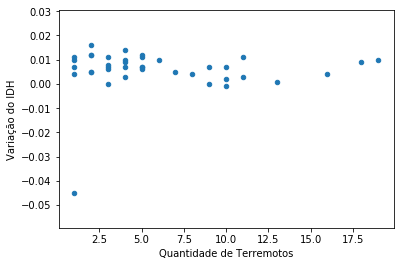

In [169]:
Tabela_Terremoto_IDH.plot.scatter(x='Quantidade de Terremotos', y='Variação do IDH');

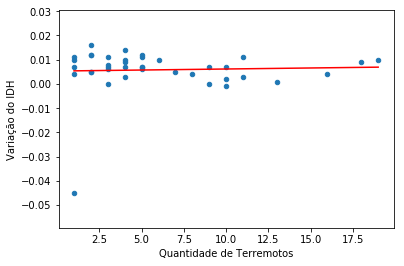

In [170]:
covariancia = Tabela_Terremoto_IDH["Quantidade de Terremotos"].cov(Tabela_Terremoto_IDH["Variação do IDH"])

variancia_X = Tabela_Terremoto_IDH["Quantidade de Terremotos"].var()
variancia_Y = Tabela_Terremoto_IDH["Variação do IDH"].var()

media_X = Tabela_Terremoto_IDH["Quantidade de Terremotos"].mean()
media_Y = Tabela_Terremoto_IDH["Variação do IDH"].mean()

a = covariancia / variancia_X
b = media_Y - a*media_X

Tabela_Terremoto_IDH.plot.scatter(x='Quantidade de Terremotos', y='Variação do IDH')

plt.plot((Tabela_Terremoto_IDH["Quantidade de Terremotos"].min(), Tabela_Terremoto_IDH["Quantidade de Terremotos"].max()), 
         (a*Tabela_Terremoto_IDH["Quantidade de Terremotos"].min() + b, a*Tabela_Terremoto_IDH["Quantidade de Terremotos"].max() + b), color='red');

Agora farei o mesmo procedimento para os dados de tempestade

In [171]:
tabela_tempestade_idx = tabela_tempestade.set_index('geo')
tabela_tempestade_1990 = tabela_tempestade_idx.loc['Afghanistan':,lista]
tabela_teve_tempestade = (tabela_tempestade_1990 > 0)
tabela_conta_tempestade = tabela_teve_tempestade.sum(axis=1)
tabela_conta_tempestade.sort_values(ascending=False)

geo
China                 19
United States         19
Vietnam               19
Philippines           19
Japan                 18
Bangladesh            18
Mexico                18
India                 16
Australia             16
South Korea           15
France                15
Thailand              15
Germany               14
Cuba                  13
Madagascar            12
Nicaragua             11
Fiji                  11
Canada                10
Pakistan              10
South Africa          10
Haiti                 10
United Kingdom        10
Russia                 9
Dominican Republic     9
Argentina              8
Jamaica                8
Iran                   8
Mozambique             7
Mongolia               7
Romania                7
                      ..
Slovenia               1
Somalia                1
Sudan                  1
Bhutan                 1
Norway                 1
Zimbabwe               1
Malawi                 1
Guinea-Bissau          1
Guinea               

In [172]:
Lista_paises = ['Indonesia','Georgia','Croatia','Yemen','Niger','Bolivia','Panama','Portugal','Nepal','Egypt','Greece','Colombia',
'Afghanistan','Sweden','Austria','Italy','Belgium','Poland','Costa Rica','Malaysia','Brazil','Spain','Mozambique','Ireland',               
'Argentina','Iran','Russia','Dominican Republic','Canada','Haiti','Nicaragua','Fiji','Madagascar','Cuba','France','South Korea',
'Japan','Bangladesh','China','United States','Vietnam','Philippines']

Lista_Numero_Tempestades = [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,5,5,5,5,5,6,7,7,6,8,8,9,9,10,10,11,11,12,13,15,15,18,18,19,19,19,19]

Tabela_Quantidade_Tempestades = {'Países': Lista_paises, 'Quantidade de Tempestades':Lista_Numero_Tempestades}
Tabela_Quantidade_Tempestades = pd.DataFrame(data=Tabela_Quantidade_Tempestades)
Tabela_Quantidade_Tempestades= Tabela_Quantidade_Tempestades.set_index('Países')
Tabela_Quantidade_Tempestades.sort_values(by='Quantidade de Tempestades',ascending=False)

,Quantidade de Tempestades
Países,
Philippines,19
Vietnam,19
United States,19
China,19
Bangladesh,18
Japan,18
France,15
South Korea,15
Cuba,13


In [173]:
Lista_paises = ['Indonesia','Georgia','Croatia','Yemen','Niger','Bolivia','Panama','Portugal','Nepal','Egypt','Greece','Colombia',
'Afghanistan','Sweden','Austria','Italy','Belgium','Poland','Costa Rica','Malaysia','Brazil','Spain','Mozambique','Ireland',               
'Argentina','Iran','Russia','Dominican Republic','Canada','Haiti','Nicaragua','Fiji','Madagascar','Cuba','France','South Korea',
'Japan','Bangladesh','China','United States','Vietnam','Philippines']

Lista_ano_semtempestade = [0.624,0.673,0.777,0.444,0.261,0.610,0.702,0.766,0.378,0.585,0.850,0.653,0.396,0.890,0.847,0.779,0.865,
0.808,0.740,0.731,0.695,0.806,0.215,0.880,0.720,0.704,0.741,0.640,0.862,0.413,0.543,0.689,0.462,0.686,0.818,0.802,0.866,0.386,0.600,0.884,0.618,0.646]


Lista_ano_comtempestade = [0.629,0.677,0.783,0.450,0.266,0.617,0.710,0.772,0.386,0.592,0.855,0.656,0.405,0.892,0.837,0.784,0.859,
0.813,0.747,0.734,0.694,0.810,0.222,0.889,0.725,0.716,0.748,0.645,0.861,0.416,0.552,0.691,0.457,0.692,0.825,0.800,0.870,0.393,0.610,0.885,0.625,0.648]

Lista_variacao_IDH = []
a=0

for e in Lista_ano_comtempestade:
    Lista_variacao_IDH.append(e-Lista_ano_semtempestade[a])
    a+=1

Tabela_Variacao_IDH = {'Países':Lista_paises , 'IDH do ano sem tempestade':Lista_ano_semtempestade, 'IDH do ano com tempestade':Lista_ano_comtempestade, 'Variação do IDH':Lista_variacao_IDH}
Tabela_Variacao_IDH = pd.DataFrame(Tabela_Variacao_IDH)
Tabela_Variacao_IDH_idx = Tabela_Variacao_IDH.set_index('Países')
Tabela_Variacao_IDH_idx

,IDH do ano com tempestade,IDH do ano sem tempestade,Variação do IDH
Países,,,
Indonesia,0.629,0.624,0.005
Georgia,0.677,0.673,0.004
Croatia,0.783,0.777,0.006
Yemen,0.450,0.444,0.006
Niger,0.266,0.261,0.005
Bolivia,0.617,0.610,0.007
Panama,0.710,0.702,0.008
Portugal,0.772,0.766,0.006
Nepal,0.386,0.378,0.008


In [174]:
Tabela_Tempestade_IDH = Tabela_Quantidade_Tempestades.join(Tabela_Variacao_IDH_idx, how='inner')
Tabela_Tempestade_IDH


,Quantidade de Tempestades,IDH do ano com tempestade,IDH do ano sem tempestade,Variação do IDH
Países,,,,
Indonesia,1,0.629,0.624,0.005
Georgia,1,0.677,0.673,0.004
Croatia,1,0.783,0.777,0.006
Yemen,1,0.450,0.444,0.006
Niger,1,0.266,0.261,0.005
Bolivia,2,0.617,0.610,0.007
Panama,2,0.710,0.702,0.008
Portugal,2,0.772,0.766,0.006
Nepal,2,0.386,0.378,0.008


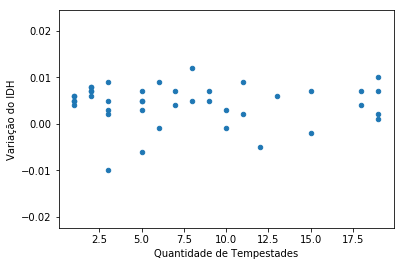

In [175]:
Tabela_Tempestade_IDH.plot.scatter(x='Quantidade de Tempestades', y='Variação do IDH');

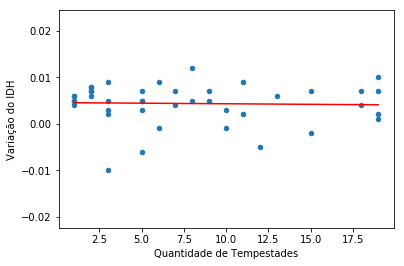

In [176]:
covariancia = Tabela_Tempestade_IDH["Quantidade de Tempestades"].cov(Tabela_Tempestade_IDH["Variação do IDH"])

variancia_X = Tabela_Tempestade_IDH["Quantidade de Tempestades"].var()
variancia_Y = Tabela_Tempestade_IDH["Variação do IDH"].var()

media_X = Tabela_Tempestade_IDH["Quantidade de Tempestades"].mean()
media_Y = Tabela_Tempestade_IDH["Variação do IDH"].mean()

a = covariancia / variancia_X
b = media_Y - a*media_X

Tabela_Tempestade_IDH.plot.scatter(x='Quantidade de Tempestades', y='Variação do IDH')

plt.plot((Tabela_Tempestade_IDH["Quantidade de Tempestades"].min(), Tabela_Tempestade_IDH["Quantidade de Tempestades"].max()), 
         (a*Tabela_Tempestade_IDH["Quantidade de Tempestades"].min() + b, a*Tabela_Tempestade_IDH["Quantidade de Tempestades"].max() + b), color='red');

# Conclusão

Antes de começar o projeto eu imaginei que os desastres naturais causariam um impacto negativo no IDH, mas como é possível ver nos gráficos conclusivos os desastres naturais não influenciam no IDH. Independentemente de ter ocorrido ou não um terremeto o IDH do país cresceu, exceto por alguns casos específicos de outliers. Outra conclusão que pode ser obtido a partir do gráfico é a de que independentemente do número de desastres naturais sofridos o país ainda terá uma variação de IDH semelhante. No começo eu imaginava que países que fossem constantemente afetados por desastres naturais teriam uma variação menor de IDH do que os pouco afetados, mas o gráfico prova que isso não é verdade. Para um trabalho futuro seria interessante estudar o impacto dos desastres naturais na economia do país, talvez nesta análise eles tenham uma influência mais forte.